In [49]:
import pandas as pd
import missingno as msn
import seaborn as sns

In [35]:
# bank = pd.read_csv("../data/raw/bank.csv") # old version
# bank_full = pd.read_csv("../data/raw/bank-full.csv") # old version
# bank_add = pd.read_csv("../data/raw/bank-additional.csv", sep=";").drop_duplicates().reset_index(drop=True)
data = pd.read_csv("../data/raw/bank-additional-full.csv", sep=";").drop_duplicates().reset_index(drop=True)

In [36]:
data.shape

(41176, 21)

In [37]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1 - Explore missing values

<AxesSubplot:>

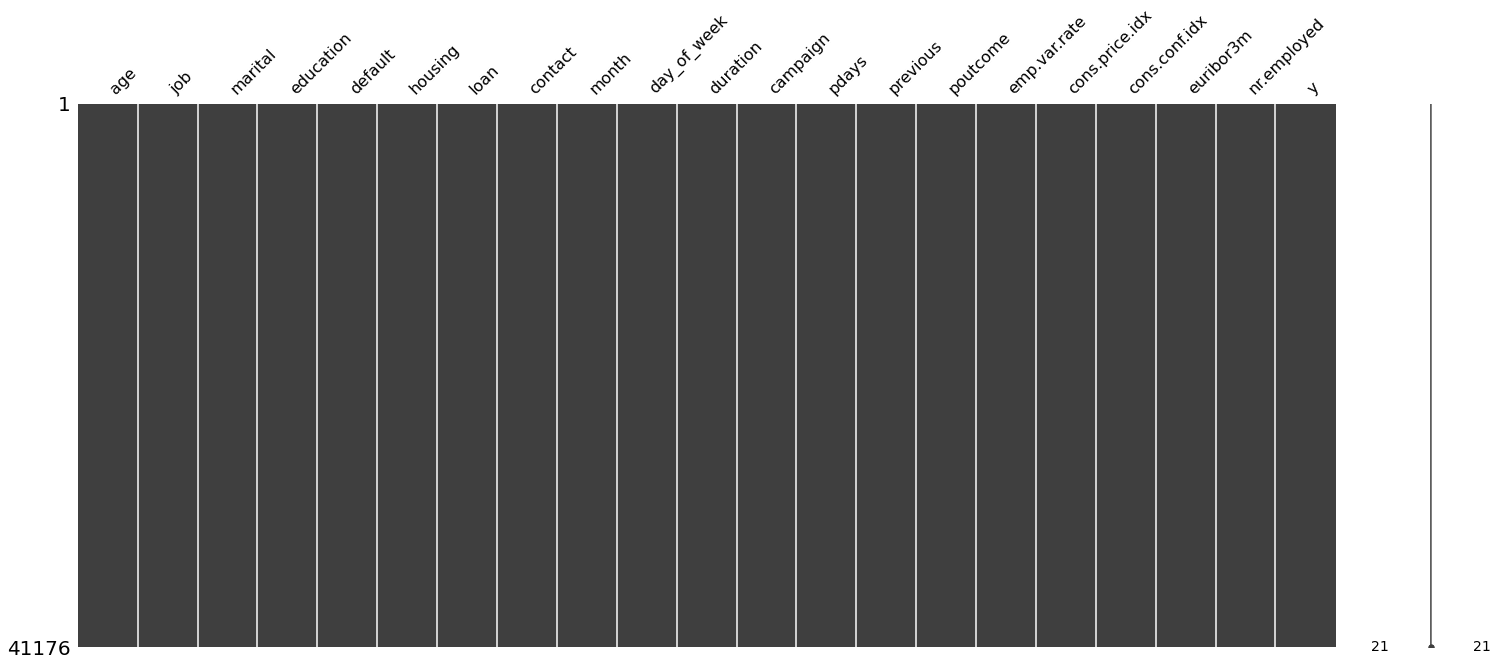

In [39]:
msn.matrix(data)

In [40]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It's actually looks like the data does not have any concret missing values. However, based on the documentation, the missing values have been replaced by the category "Unkwon"

## 2 - Duplicates and low variance data

In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [43]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### 2.a - Age columns

C:\Users\yameo\AppData\Local\Temp\ipykernel_21536\2127665889.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<AxesSubplot:xlabel='age', ylabel='count'>

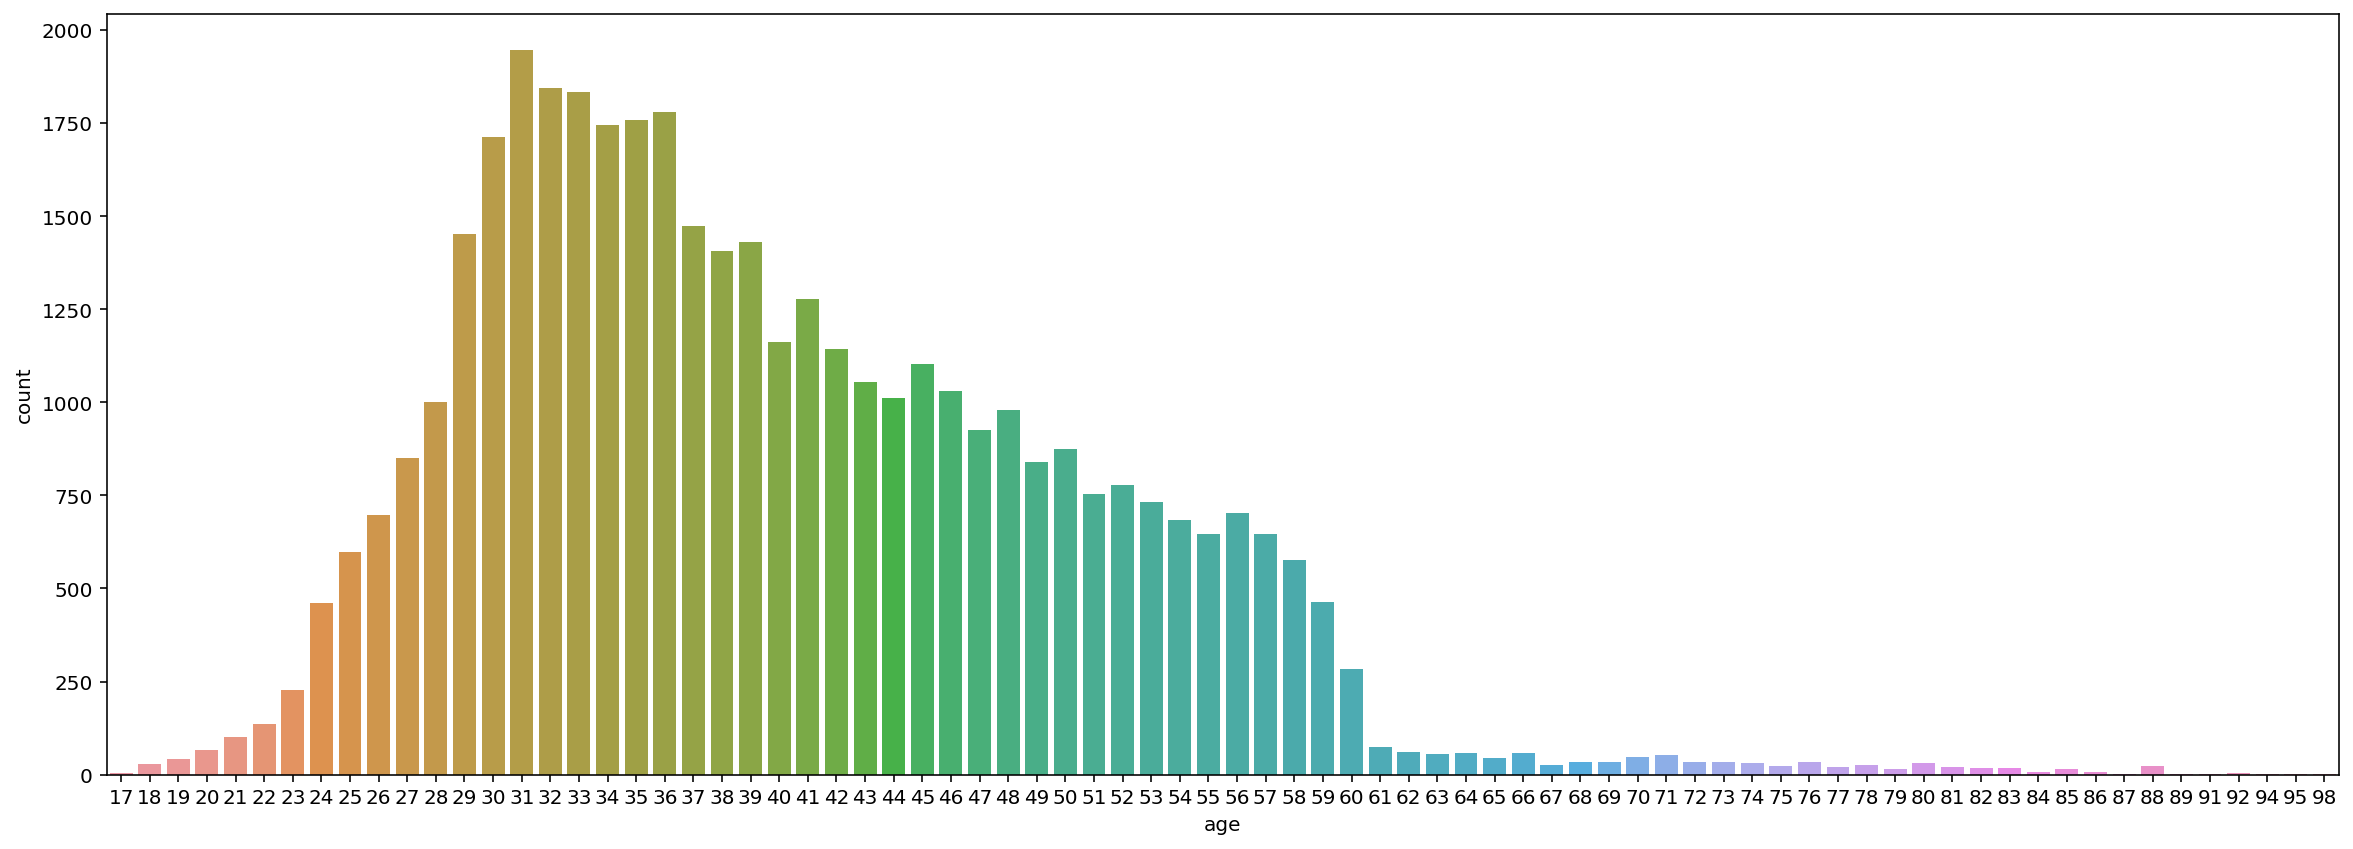

In [91]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.figure(figsize=(20,7))
sns.countplot(x="age", data=data)

we will considere age as numeric and continue and normalize it

### 2.b Job

In [93]:
data.job.value_counts()

admin            10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [98]:
data.job.replace("admin.","admin",inplace=True)
data.rename(columns={"y":"subscribed"}, inplace=True)

In [99]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,has_been_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [56]:
len(data.job.unique())

12

We will use categorical embedding

cat_emb_cols = ["job","marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
bin_col = ["contact","y"]
numerical = ["age","duration","campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"]
"duration" is to be excluded because it's

In [75]:
cat_emb_cols = ["job","marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
bin_col = ["contact","y"]
numerical = ["age","duration","campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"]

In [81]:
# for col in cat_emb_cols:
import numpy as np
data[cat_emb_cols] = data[cat_emb_cols].astype("category")
data[bin_col] = data[bin_col].astype("category")
data["has_been_contacted"] = np.where(data.pdays == 999, 1, 0)

In [102]:
data.to_csv("../data/clean/clean_bank_full.csv", index=False)

In [82]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,has_been_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


<AxesSubplot:xlabel='has_been_contacted', ylabel='count'>

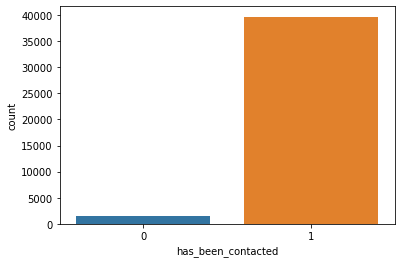

In [83]:
sns.countplot(x="has_been_contacted", data=data)

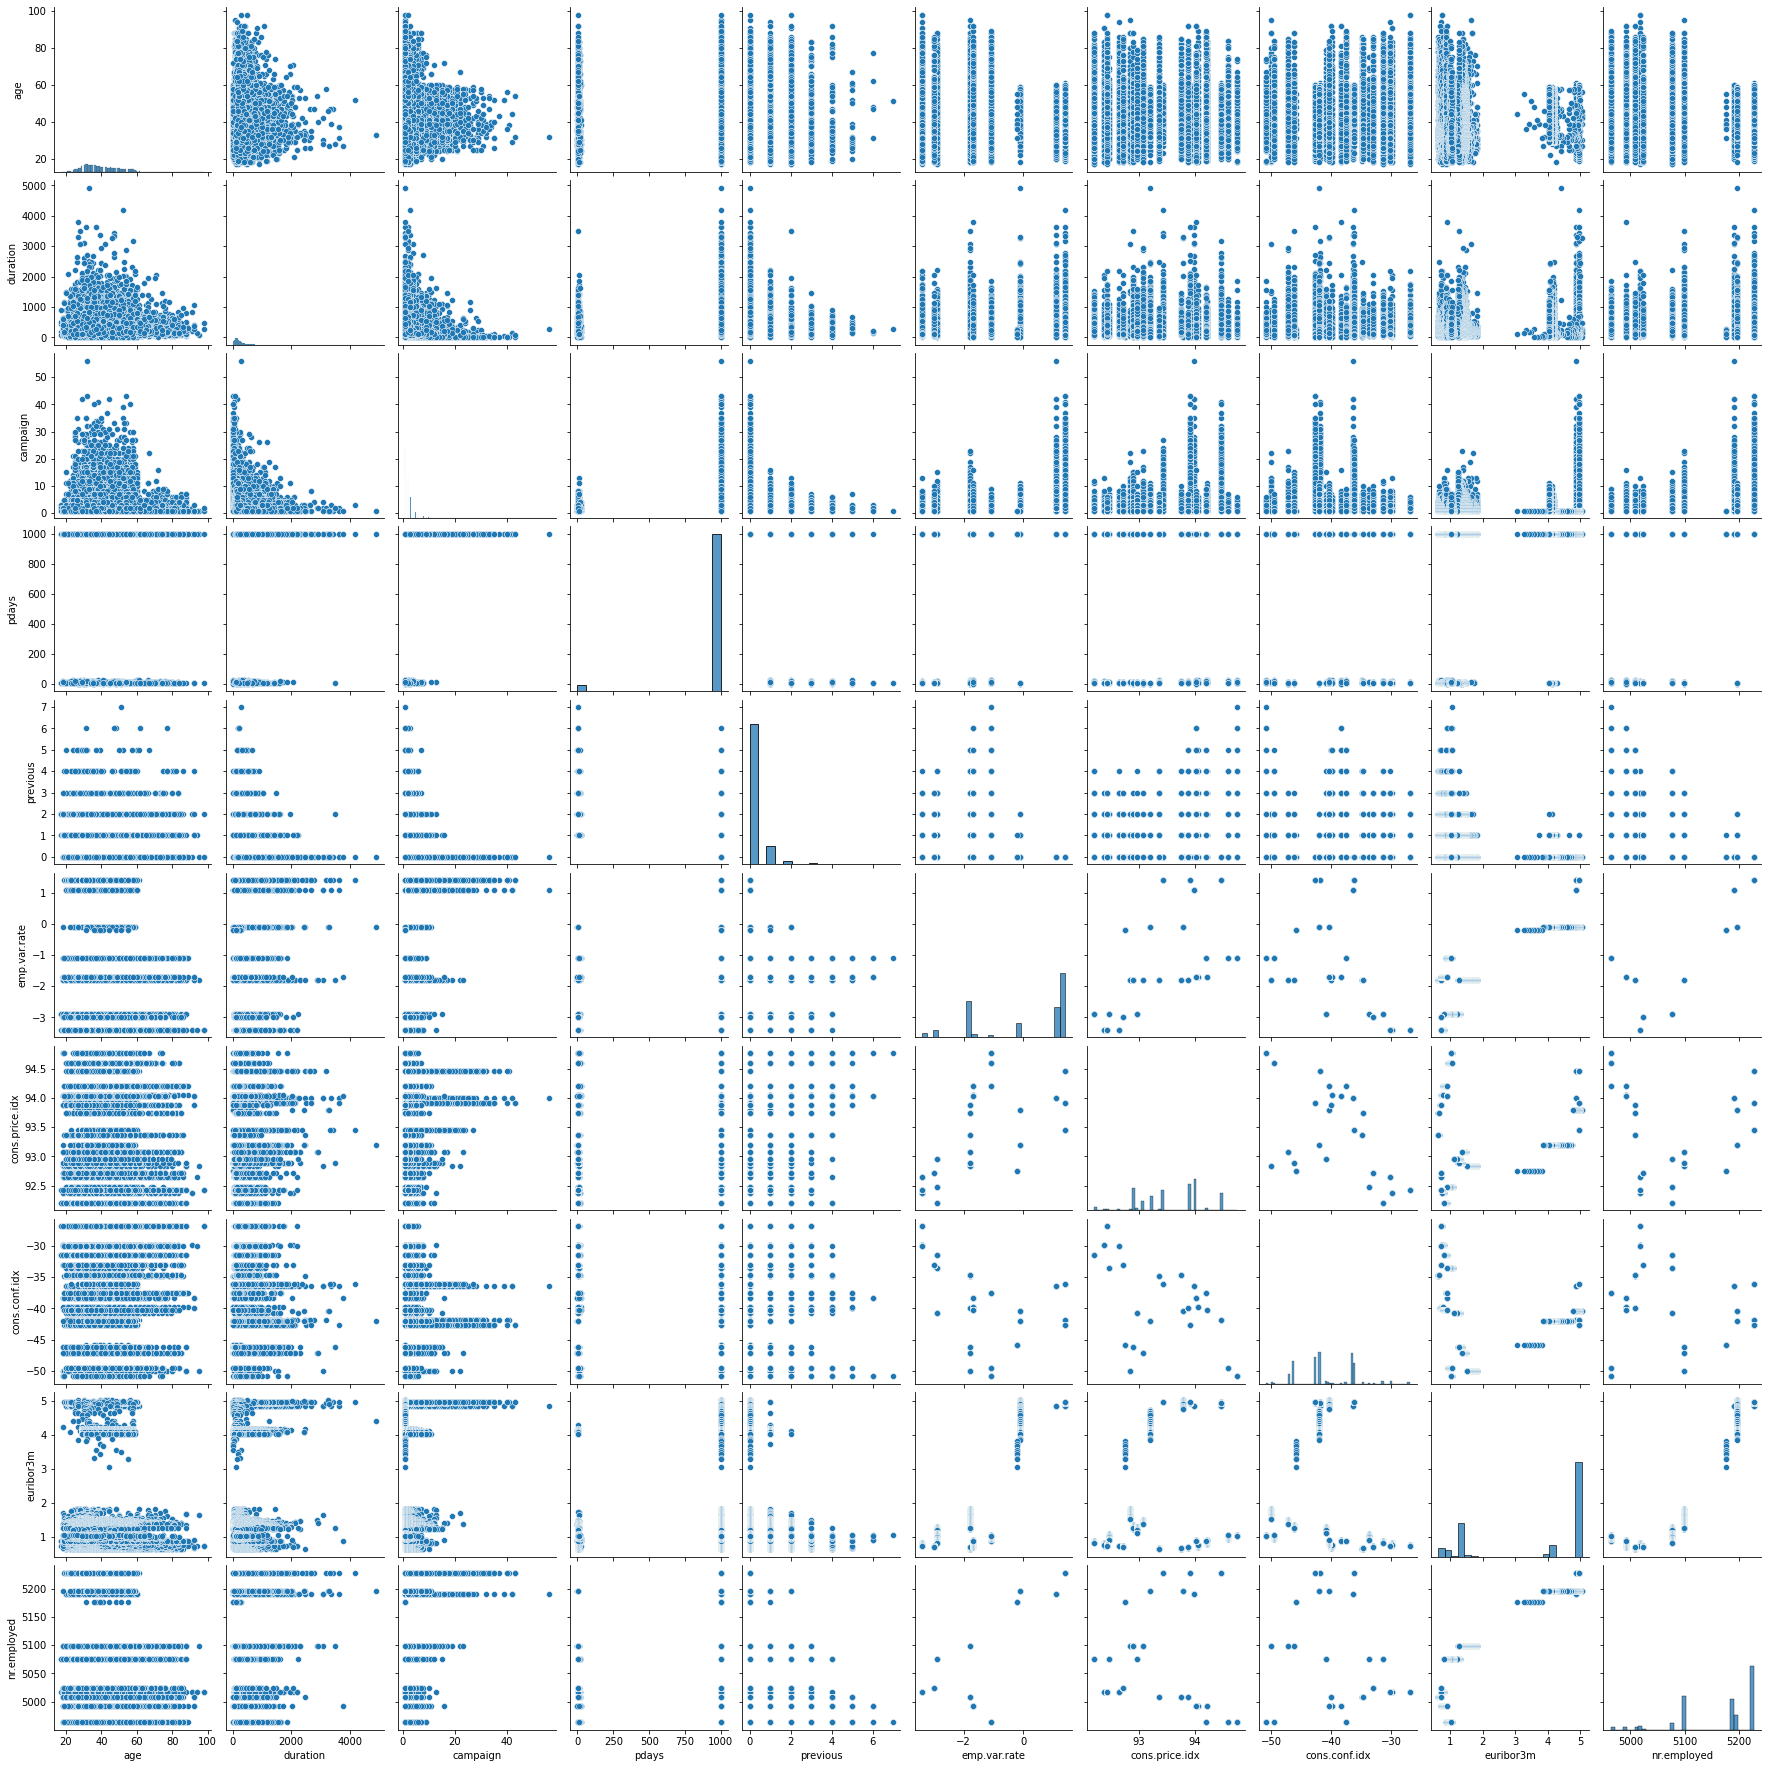

In [90]:
# sns.displot(x="emp.var.rate", data=data)
sns.pairplot(data=data[numerical])

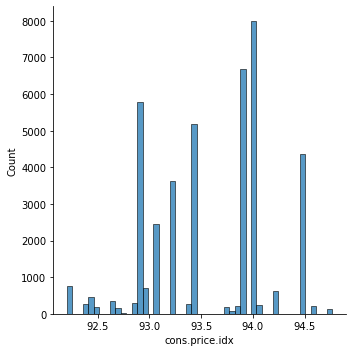

In [86]:
sns.scatterplot(x="cons.conf.idx", y="cons.price.idx", data=data)

<AxesSubplot:xlabel='cons.conf.idx', ylabel='cons.price.idx'>

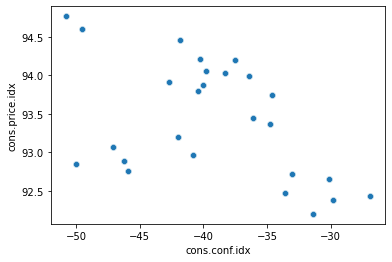

In [89]:
sns.scatterplot(x="cons.conf.idx", y="cons.price.idx", data=data)